## Case Study 2 : Analyzing data from MovieLens

TEAM Member: Matt Curcio

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set. It contains data about users and how the rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6 Pg 171-172,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a ipython notebook installation, python 2.7

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)

##Problem 1: Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

###Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [1]:
# importing packages 

import pandas as pd
from matplotlib.pyplot import * 
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pylab as py
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# defining function to read and save data to file
def save_hdf5(filename, data):
    data.to_hdf(filename, 'table', append=True)

def read_hdf5(filename):
    return pd.read_hdf(filename, 'table')

In [4]:
# read users data
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('users.dat', sep='::', header=None, names=unames)
# read ratings data
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ratings.dat', sep='::', header=None, names=rnames)

# read movies data
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('movies.dat', sep='::', header=None, names=mnames)
# merge data
data = pd.merge(pd.merge(ratings, users), movies)
# save in HDF5 format
save_hdf5('movielens_1M.h5', data)


In [5]:
#load data
data = read_hdf5('movielens_1M.h5')

In [6]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [7]:
# average rating overall
mean_ratings = data.pivot_table('rating', rows='title', aggfunc='mean')
good_reviews_idx = mean_ratings.index[mean_ratings > 4.5]
good_ratings = mean_ratings.ix[good_reviews_idx]
print 'Movies with overall mean rating over 4.5:', len(good_ratings)

Movies with overall mean rating over 4.5: 21


In [ ]:
data = read_hdf5('movielens_1M.h5')

# average rating by gender
mean_ratings = data.pivot_table('rating', rows='title', cols='gender', aggfunc='mean')

good_reviews_idx_m = mean_ratings.index[mean_ratings['M'] > 4.5]
good_reviews_idx_f = mean_ratings.index[mean_ratings['F'] > 4.5]
good_ratings_m = mean_ratings.ix[good_reviews_idx_m]
good_ratings_f = mean_ratings.ix[good_reviews_idx_f]
print 'Movies with male mean rating over 4.5:', len(good_ratings_m)
print 'Movies with female mean rating over 4.5:', len(good_ratings_f)

In [9]:
data = read_hdf5('movielens_1M.h5')

# median rating by gender and age > 30
over_30 = data[(data['age'] > 30)]
median_ratings = over_30.pivot_table('rating', rows='title', cols='gender', aggfunc='median')
good_reviews_idx_m = median_ratings.index[median_ratings['M'] > 4.5]
good_reviews_idx_f = median_ratings.index[median_ratings['F'] > 4.5]
good_ratings_m = median_ratings.ix[good_reviews_idx_m]
good_ratings_f = median_ratings.ix[good_reviews_idx_f]
print 'Movies with 31+ y.o. male median rating over 4.5:', len(good_ratings_m)
print 'Movies with 31+ y.o. female median rating over 4.5:', len(good_ratings_f)

Movies with 31+ y.o. male median rating over 4.5: 86
Movies with 31+ y.o. female median rating over 4.5: 149


In [10]:
data = read_hdf5('movielens_1M.h5')

# top 10 most reviewed movies
top_10 = data.groupby('title').size().order(ascending=False)[:10]
top_10

title
American Beauty (1999)                                   6856
Star Wars: Episode IV - A New Hope (1977)                5982
Star Wars: Episode V - The Empire Strikes Back (1980)    5980
Star Wars: Episode VI - Return of the Jedi (1983)        5766
Jurassic Park (1993)                                     5344
Saving Private Ryan (1998)                               5306
Terminator 2: Judgment Day (1991)                        5298
Matrix, The (1999)                                       5180
Back to the Future (1985)                                5166
Silence of the Lambs, The (1991)                         5156
dtype: int64

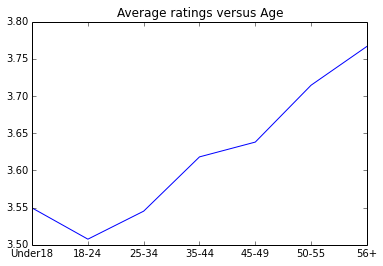

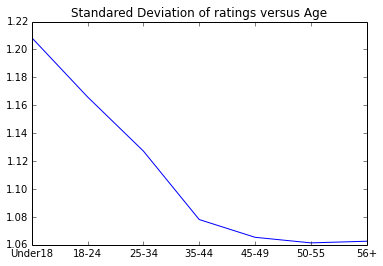

In [11]:
#how easy each group is pleased

rate=list(data['rating'].groupby(data['age']).mean())
x=[1,2,3,4,5,6,7]
title("Average ratings versus Age")
xticks([1,2,3,4,5,6,7],["Under18","18-24","25-34","35-44","45-49","50-55","56+"])
plot(x,rate)
show()

rate_sd=Series(data['rating'].groupby(data['age']).std())
x=[1,2,3,4,5,6,7]
title("Standared Deviation of ratings versus Age")
xticks([1,2,3,4,5,6,7],["Under18","18-24","25-34","35-44","45-49","50-55","56+"])
plot(x,rate_sd)
show()

{'boxes': [<matplotlib.lines.Line2D at 0x7fd3debcb250>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd3debd7590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3debcbed0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd3debcb890>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd3debd1c10>,
  <matplotlib.lines.Line2D at 0x7fd3debd1e90>]}

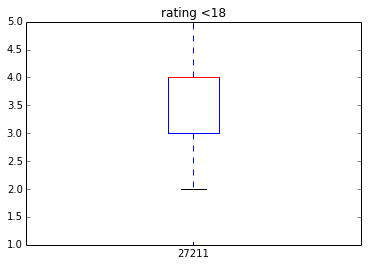

In [16]:
#boxplot for the age 
age=dict(list(data.groupby('age')))
counts=list(data.groupby("age").size())
#len(subset_age)
# subplot(241)
age1=list(age[1]['rating'])
title("rating <18")
xticks([1],[counts[0]])
boxplot(age1)

(array([ 2238.,     0.,  2983.,     0.,     0.,  6380.,     0.,  8808.,
           0.,  6802.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

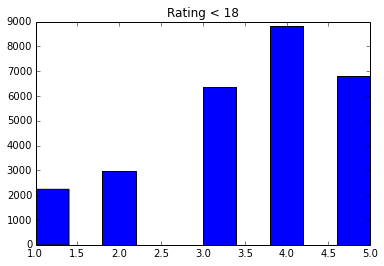

In [62]:
#len(subset_age)
age1=list(age[1]['rating'])
title("Rating < 18")
hist(age1,bins=10)


(array([ 13063.,      0.,  22073.,      0.,      0.,  47601.,      0.,
        60241.,      0.,  40558.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

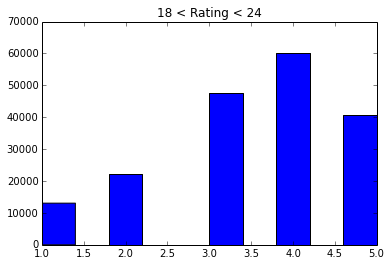

In [65]:
age18=list(age[18]['rating'])
title("18 < Rating < 24")
hist(age18,bins=10)

(array([  23898.,       0.,   44817.,       0.,       0.,  104287.,
             0.,  136824.,       0.,   85730.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

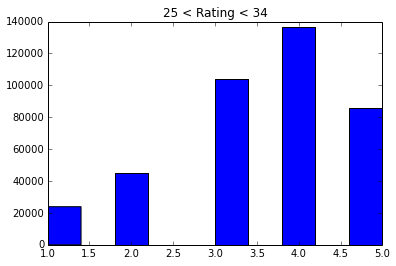

In [66]:
age25=list(age[25]['rating'])
title("25 < Rating < 34")
hist(age25,bins=10)

(array([  9067.,      0.,  20253.,      0.,      0.,  52990.,      0.,
        71983.,      0.,  44710.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

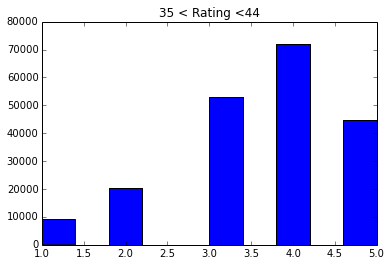

In [67]:
age35=list(age[35]['rating'])
title("35 < Rating <44")
hist(age35,bins=10)

(array([  3409.,      0.,   8437.,      0.,      0.,  22311.,      0.,
        30334.,      0.,  19142.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

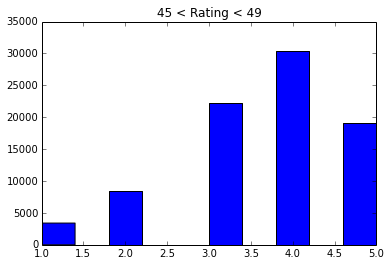

In [68]:
age45=list(age[45]['rating'])
title("45 < Rating < 49")
hist(age45,bins=10)

(array([  2948.,      0.,   5993.,      0.,      0.,  18465.,      0.,
        26484.,      0.,  18600.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

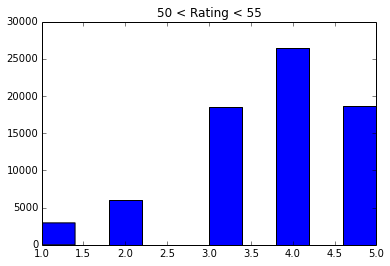

In [70]:
age50=list(age[50]['rating'])
title("50 < Rating < 55")
hist(age50,bins=10)

(array([  1551.,      0.,   3001.,      0.,      0.,   9163.,      0.,
        14297.,      0.,  10768.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

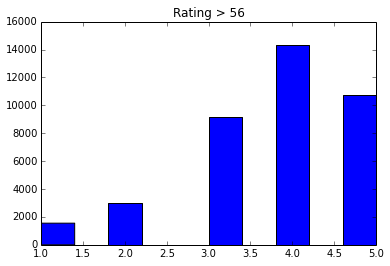

In [71]:
age56=list(age[56]['rating'])
title("Rating > 56")
hist(age56,bins=10)

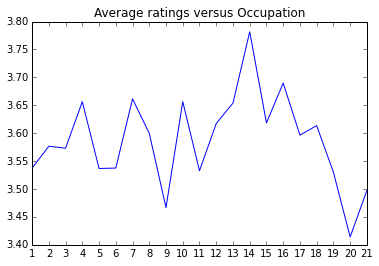

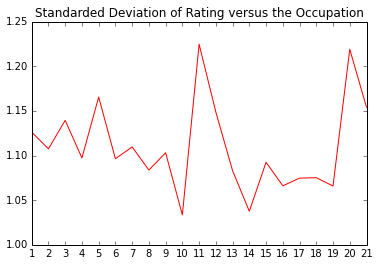

In [18]:
rate=list(data['rating'].groupby(data['occupation']).mean())
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]

title("Average ratings versus Occupation")
xticks(x,x)
#xticks(x,["other or not specified","academic/educator","artist",
#          "clerical/admin","college/grad student","customer service",
#         "doctor/health care","executive/managerial","farmer","homemaker",
#          "K-12 student","lawyer","programmer","retired","sales/marketing",
#          "scientist","self-employed","technician/engineer",
#          "tradesman/craftsman","unemployed","writer"])
plot(x,rate)
show()
title("Standarded Deviation of Rating versus the Occupation")
sd=rate=list(data['rating'].groupby(data['occupation']).std())
xticks(x,x)
plot(x,sd,color='r')
show()

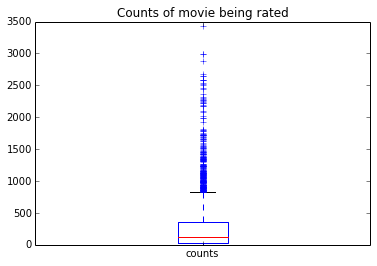

In [73]:
#define "popular" and justify
#using boxplot to get shape of movie counting
counts=list(data.groupby("movie_id").size())
title("Counts of movie being rated ")
xticks([1],["counts"])
boxplot(counts)
show()
#get the baisic idea of the spread of these data
#I m intested in the movies which were rated larger than the upper inner fence which is 3rd quantile + 1.5 IQR


array([[<matplotlib.axes.AxesSubplot object at 0x7fd3a16f4990>]], dtype=object)

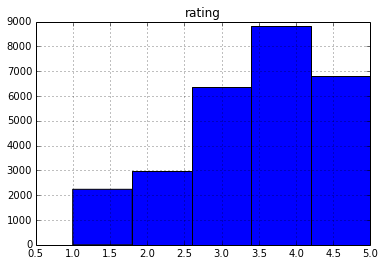

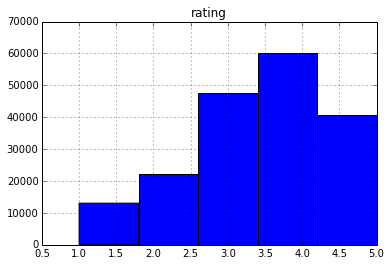

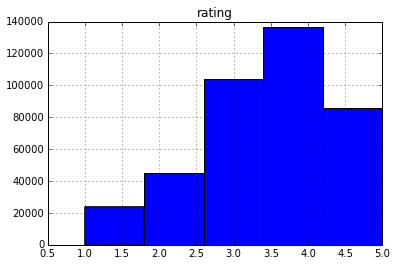

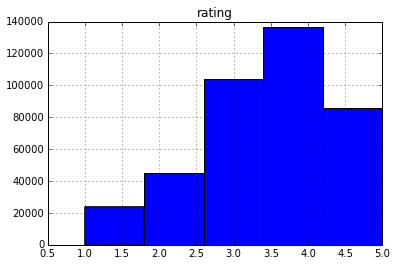

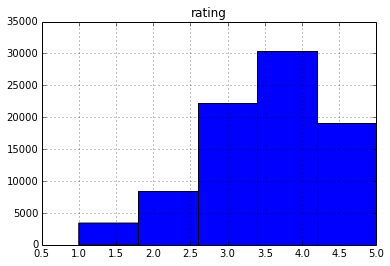

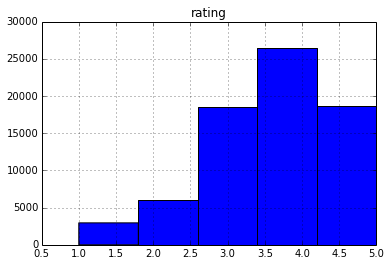

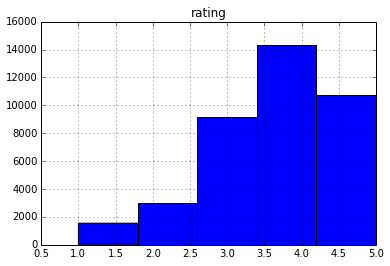

In [77]:
age_under_18 = data[(data['age'] == 1)]
age_18_24 = data[(data['age'] == 18)]
age_25_34 = data[(data['age'] == 25)]
age_35_44 = data[(data['age'] == 25)]
age_45_49 = data[(data['age'] == 45)]
age_50_55 = data[(data['age'] == 50)]
age_56_older = data[(data['age'] == 56)]

age_under_18.hist(column='rating', bins=5)
age_18_24.hist(column='rating', bins=5)
age_25_34.hist(column='rating', bins=5)
age_35_44.hist(column='rating', bins=5)
age_45_49.hist(column='rating', bins=5)
age_50_55.hist(column='rating', bins=5)
age_56_older.hist(column='rating', bins=5)

## Problem 2: Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* Plot a histogram of the ratings of all movies.
* Plot a histogram of the *number* of ratings each movie recieved.
* Plot a histogram of the *average rating* for each movie.
* Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

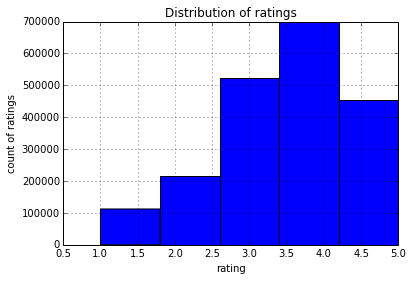

In [11]:
#good movies can be trusted

#data = read_hdf5('movielens_1M.h5')

# rating histogram
data.hist(column='rating', bins=5)
plt.title('Distribution of ratings')
plt.ylabel('count of ratings')
plt.xlabel('rating')


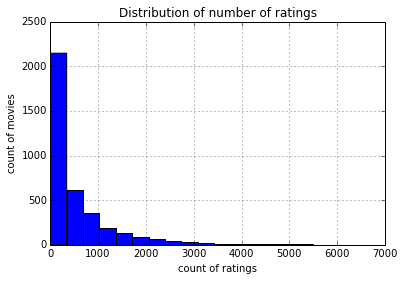

In [12]:
#data = read_hdf5('movielens_1M.h5')

# count of ratings per movie histogram
ratings_count = data.groupby('title').size()
ratings_count.hist(bins=20)
plt.title('Distribution of number of ratings')
plt.ylabel('count of movies')
plt.xlabel('count of ratings')

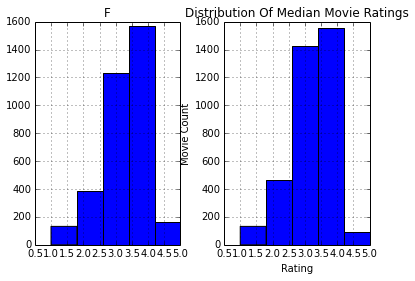

In [13]:
#data = read_hdf5('movielens_1M.h5')

# average rating per movie histogram 
mean_ratings = data.pivot_table('rating', rows='title', cols='gender', aggfunc='median')
mean_ratings.hist(bins=5)
plt.title('Distribution Of Median Movie Ratings')
plt.ylabel('Movie Count')
plt.xlabel('Rating')

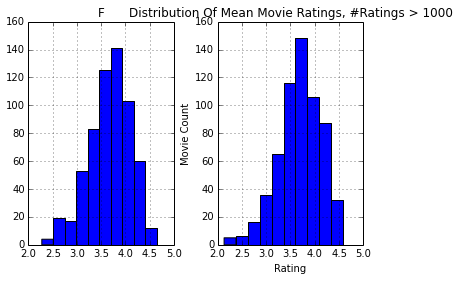

In [14]:
#data = read_hdf5('movielens_1M.h5')

# at least 1000 ratings
ratings_by_title = data.groupby('title').size()
atleast_100_idx = ratings_by_title.index[ratings_by_title > 1000]
mean_ratings = data.pivot_table('rating', rows='title', cols='gender', aggfunc='mean')
mean_ratings = mean_ratings.ix[atleast_100_idx]
mean_ratings.hist(bins=10)
plt.title('Distribution Of Mean Movie Ratings, #Ratings > 1000')
plt.ylabel('Movie Count')
plt.xlabel('Rating')

In [28]:
#data = read_hdf5('movielens_1M.h5')

ratings_by_genres = data.groupby('genres').size()
dictionary = {}
for idx in ratings_by_genres.iteritems():
    genres = idx[0].split('|')
    for g in genres:
        if g in dictionary.keys():
            dictionary[g] += idx[1]
        else:
            dictionary[g] = idx[1]
print dictionary

{'Mystery': 40178, 'Drama': 354529, 'Sci-Fi': 157294, 'Fantasy': 36301, 'Horror': 76386, 'Film-Noir': 18261, 'Crime': 79541, 'Romance': 147523, "Children's": 72186, 'Musical': 41533, 'Animation': 43293, 'Adventure': 133953, 'Action': 257457, 'Comedy': 356580, 'Documentary': 7910, 'War': 68527, 'Thriller': 189680, 'Western': 20683}


{'boxes': [<matplotlib.lines.Line2D at 0x7fd3dbb666d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd3dbb5da10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3dbb72390>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd3dbb66d10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd3dbb5d0d0>,
  <matplotlib.lines.Line2D at 0x7fd3dbb5d350>]}

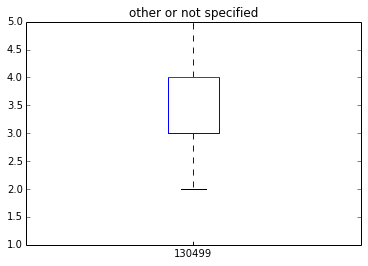

In [83]:
## conjecture about occupation
#occupation  versus age
occ=dict(list(data.groupby('occupation')))
counts=list(data.groupby("occupation").size())
#print occ

occ0=list(occ[0]['rating'])
title("Other or Not Specified") # 
xticks([1],[counts[0]])
boxplot(occ0)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd3954e0350>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd3b6a9a690>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3954e0fd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd3954e0990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd3b6a8dd10>,
  <matplotlib.lines.Line2D at 0x7fd3b6a8df90>]}

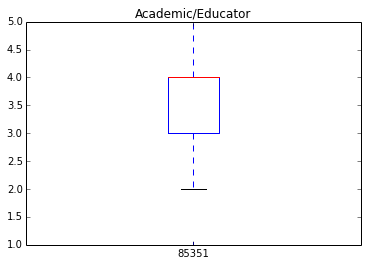

In [84]:
occ1=list(occ[1]['rating'])
title("Academic/Educator") # 
xticks([1],[counts[1]])
boxplot(occ1)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd3b6a2d250>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd3b6ab6590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3b6a2ded0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd3b6a2d890>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd3b6aa8c10>,
  <matplotlib.lines.Line2D at 0x7fd3b6aa8e90>]}

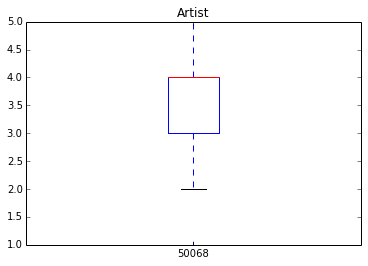

In [85]:
occ2=list(occ[2]['rating'])
title("Artist")
xticks([1],[counts[2]])
boxplot(occ2)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd3db1760d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd3db164410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3db176d50>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd3db176710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd3db148ad0>,
  <matplotlib.lines.Line2D at 0x7fd3db148d50>]}

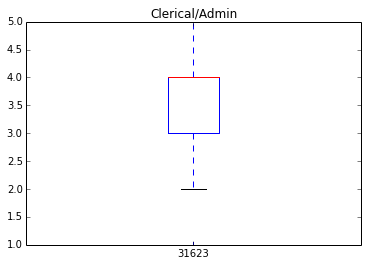

In [86]:
occ3=list(occ[3]['rating'])
title("Clerical/Admin") 
xticks([1],[counts[3]])
boxplot(occ3)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd38c911fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd38c911350>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd3dcd4bc90>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd3dcd4b650>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd38c9209d0>,
  <matplotlib.lines.Line2D at 0x7fd38c920c50>]}

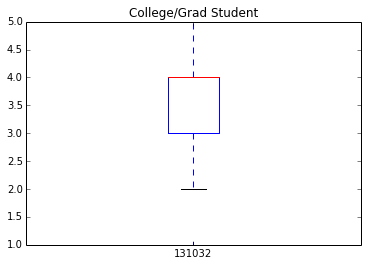

In [87]:
occ4=list(occ[4]['rating'])
title("College/Grad Student") 
xticks([1],[counts[4]])
boxplot(occ4)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd399ef7d90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd399ef7110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd38bb6ca50>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd38bb6c410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd399ee0790>,
  <matplotlib.lines.Line2D at 0x7fd399ee0a10>]}

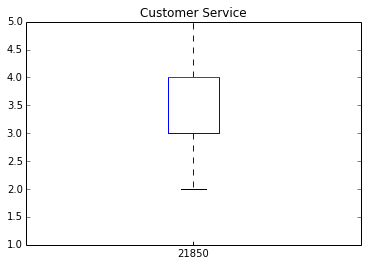

In [88]:
occ5=list(occ[5]['rating'])
title("Customer Service") 
xticks([1],[counts[5]])
boxplot(occ5)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd39ab2bd10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd39ab2b090>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd39ab319d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd39ab31390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd39ab17710>,
  <matplotlib.lines.Line2D at 0x7fd39ab17990>]}

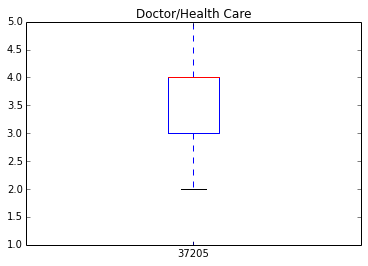

In [89]:
occ6=list(occ[6]['rating'])
title("Doctor/Health Care") 
xticks([1],[counts[6]])
boxplot(occ6)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd39b8e6c50>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd39b8daf90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd39b8f6910>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd39b8f62d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd39b8da650>,
  <matplotlib.lines.Line2D at 0x7fd39b8da8d0>]}

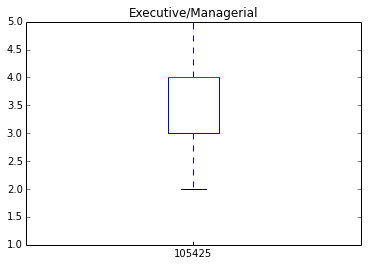

In [90]:
occ7=list(occ[7]['rating'])
title("Executive/Managerial") 
xticks([1],[counts[7]])
boxplot(occ7)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd39a661050>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd39a661450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd39ad465d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd39ad46b50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd39bc95410>,
  <matplotlib.lines.Line2D at 0x7fd39bc95dd0>]}

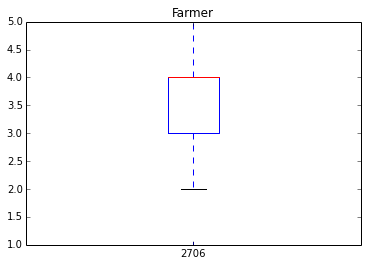

In [92]:
occ8=list(occ[8]['rating'])
title("Farmer") 
xticks([1],[counts[8]])
boxplot(occ8)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd38d0b2710>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd38d0b2bd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd38d098ed0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd38d098dd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd39a8fd690>,
  <matplotlib.lines.Line2D at 0x7fd39a8fdd10>]}

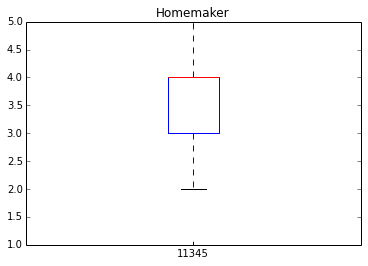

In [94]:
occ9=list(occ[9]['rating'])
title("Homemaker") 
xticks([1],[counts[9]])
boxplot(occ9)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd39aa93250>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd39aa80590>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd39aa93ed0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd39aa93890>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd38ce73c10>,
  <matplotlib.lines.Line2D at 0x7fd38ce73e90>]}

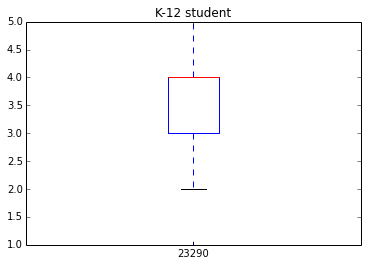

In [95]:
occ10=list(occ[10]['rating'])
title("K-12 student") 
xticks([1],[counts[10]])
boxplot(occ10)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd399f240d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd399f3f410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd399f24d50>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd399f24710>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd399f12a90>,
  <matplotlib.lines.Line2D at 0x7fd399f12d10>]}

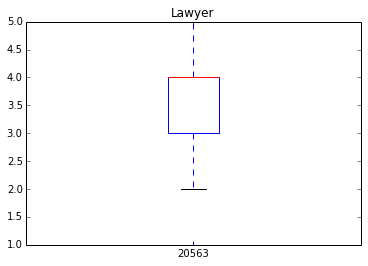

In [96]:
occ11=list(occ[11]['rating'])
title("Lawyer") #
xticks([1],[counts[11]])
boxplot(occ11)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd39bbdff10>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd39bbdf290>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd39bbf0bd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd39bbf0590>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd39bbcc910>,
  <matplotlib.lines.Line2D at 0x7fd39bbccb90>]}

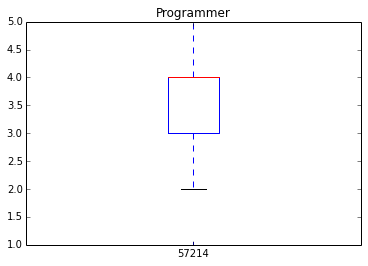

In [97]:
occ12=list(occ[12]['rating'])
title("Programmer") # 
xticks([1],[counts[12]])
boxplot(occ12)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd39a4dfd90>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd39a4df110>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd39a4c5a50>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd39a4c5410>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd39b42c790>,
  <matplotlib.lines.Line2D at 0x7fd39b42ca10>]}

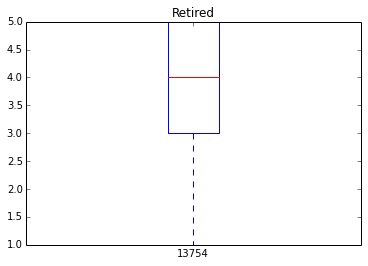

In [98]:
occ13=list(occ[13]['rating'])
title("Retired") # 
xticks([1],[counts[13]])
boxplot(occ13)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd39b0c9bd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd39b0e9f10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd39b0da890>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd39b0da250>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd39b0e95d0>,
  <matplotlib.lines.Line2D at 0x7fd39b0e9850>]}

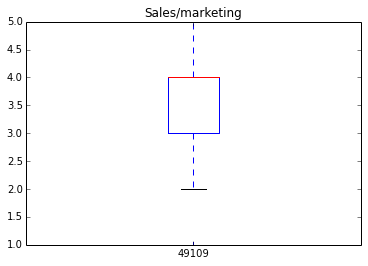

In [99]:
occ14=list(occ[14]['rating'])
title("Sales/marketing") 
xticks([1],[counts[14]])
boxplot(occ14)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd39aded950>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd39ade2c90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd39adf7610>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd39adedf90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd39ade2350>,
  <matplotlib.lines.Line2D at 0x7fd39ade25d0>]}

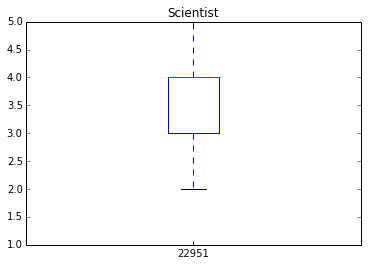

In [100]:
occ15=list(occ[15]['rating'])
title("Scientist") # 
xticks([1],[counts[15]])
boxplot(occ15)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd39baa08d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd39ba97c10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd39a263590>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd39baa0f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd39ba972d0>,
  <matplotlib.lines.Line2D at 0x7fd39ba97550>]}

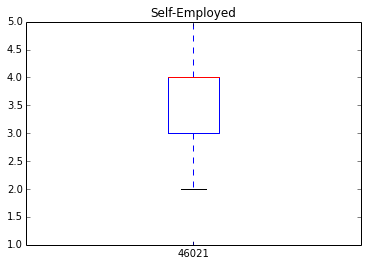

In [101]:
occ16=list(occ[16]['rating'])
title("Self-Employed") 
xticks([1],[counts[16]])
boxplot(occ16)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd39bc8b750>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd38fb6ca90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd39bc98410>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd39bc8bd90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd38fb6c150>,
  <matplotlib.lines.Line2D at 0x7fd38fb6c3d0>]}

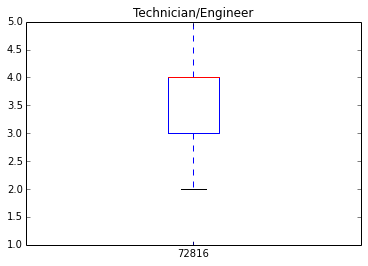

In [102]:
occ17=list(occ[17]['rating'])
title("Technician/Engineer") 
xticks([1],[counts[17]])
boxplot(occ17)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd39b1af5d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd39b1a5910>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd39b1bc290>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd39b1afc10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd39b191f90>,
  <matplotlib.lines.Line2D at 0x7fd39b1a5250>]}

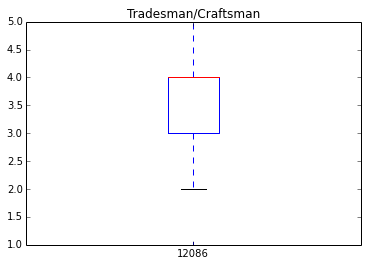

In [103]:
occ18=list(occ[18]['rating'])
title("Tradesman/Craftsman")
xticks([1],[counts[18]])
boxplot(occ18)

{'boxes': [<matplotlib.lines.Line2D at 0x7fd39b4b6450>],
 'caps': [<matplotlib.lines.Line2D at 0x7fd39b4b5790>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fd395cee110>,
 'medians': [<matplotlib.lines.Line2D at 0x7fd39b4b6a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fd39b4a3e10>,
  <matplotlib.lines.Line2D at 0x7fd39b4b50d0>]}

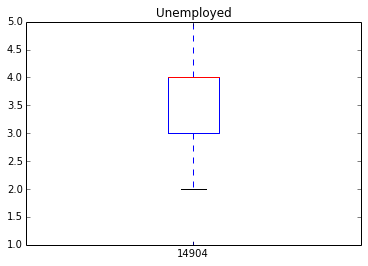

In [104]:
occ19=list(occ[19]['rating'])
title("Unemployed")
xticks([1],[counts[19]])
boxplot(occ19)

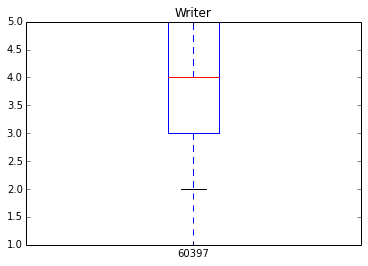

In [93]:
occ20=list(occ[20]['rating'])
title("Writer")
xticks([1],[counts[20]])
boxplot(occ20)


*------------------------

## Problem 3: Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* Make a scatter plot of men versus women and their mean rating for every movie.
* Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

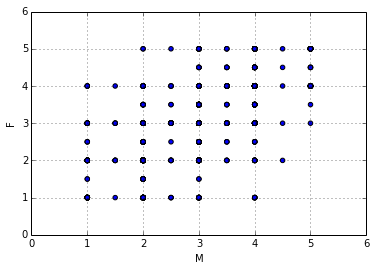

In [15]:
#data = read_hdf5('movielens_1M.h5')

# scatter plot of average rating by gender
mean_ratings = data.pivot_table('rating', rows='title', cols='gender', aggfunc='median')
mean_ratings.plot(x='M', y='F', kind='scatter')

#py.savefig('figures/scatter.png')


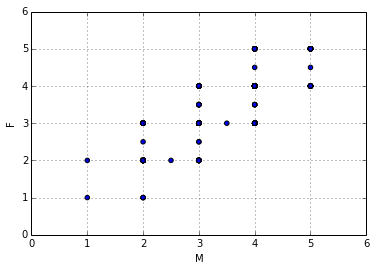

In [36]:
#data = read_hdf5('movielens_1M.h5')

# scatter plot of average rating by gender for movies with 201+ ratings
ratings_by_title = data.groupby('title').size()
atleast_200_idx = ratings_by_title.index[ratings_by_title > 200]
mean_ratings = data.pivot_table('rating', rows='title', cols='gender', aggfunc='median')
mean_ratings = mean_ratings.ix[atleast_200_idx]
mean_ratings.plot(x='M', y='F', kind='scatter')

#py.savefig('figures/scatter_cleaned.png')


In [37]:
#data = read_hdf5('movielens_1M.h5')

# correlation coefficient
mean_ratings = data.pivot_table('rating', rows='title', cols='gender', aggfunc='median')
mean_ratings.corr()

gender,F,M
gender,,
F,1.000000,0.708826
M,0.708826,1.000000


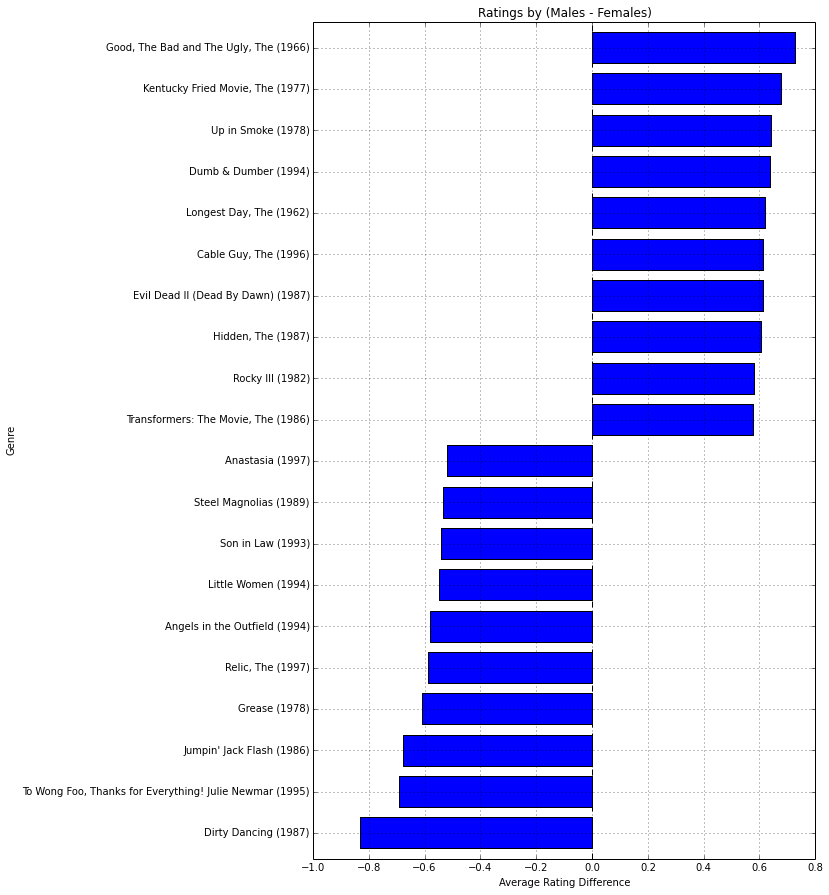

In [106]:
#data = read_hdf5('movielens_1M.h5')

ratings_by_id = data.groupby('movie_id').size()
atleast_200_idx = ratings_by_id.index[ratings_by_id > 200]
pivoted = data[data.movie_id.isin(atleast_200_idx)].pivot_table('rating', rows='title', cols='gender')
pivoted['diff'] = pivoted.M - pivoted.F
#pivoted.reset_index('movie_id', inplace=True)
disagreements = pivoted['diff']
top_male = disagreements.order()[-10:]
top_female = disagreements.order()[:10]
top_disagreements = pd.concat([top_male, top_female])
top_disagreements.order().plot(kind='barh', figsize=[9, 15])
plt.title('Ratings by (Males - Females)')
plt.ylabel('Genre')
plt.xlabel('Average Rating Difference')

#py.savefig('figures/genres_diff.png')

## Problem 4: Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer.
* Suppose you are a Data Sciencetist at a movie company.  Convince your boss that your conjecture is correct!

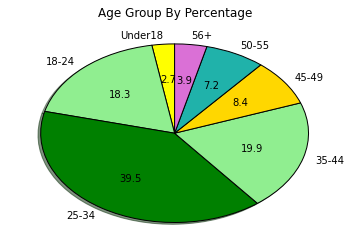

In [112]:
#which age group is main costomer?
age_size=data['user_id'].groupby(data['age']).size()
x=["Under18","18-24","25-34","35-44","45-49","50-55","56+"]
colors=['yellow', 'lightgreen', 'green', 'lightgreen','gold','lightseagreen','orchid']
title("Age Group By Percentage")
pie(age_size, labels=x, colors=colors, autopct='%1.1f', shadow=True, startangle=90)

show()


In [41]:
#get subset
data25_34=data[data['age']==25]
data18_24=data[data['age']==18]
data35_44=data[data['age']==35]

data18_44=data25_34.append(data18_24)
data18_44=data18_44.append(data35_44)

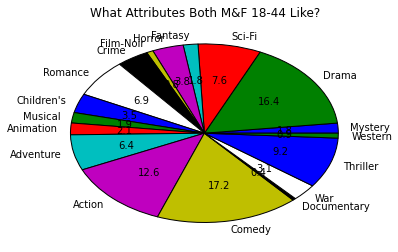

In [113]:
#what they like
genres=data18_44.groupby('genres')
size=genres.size()

ratings_by_genres = data18_44.groupby('genres').size()
dictionary = {}
for idx in ratings_by_genres.iteritems():
    genres = idx[0].split('|')
    for g in genres:
        if g in dictionary.keys():
            dictionary[g] += idx[1]
        else:
            dictionary[g] = idx[1]
#print dictionary

movies_genres=dictionary.keys()
counts=[]
for x in movies_genres:
     counts.append(dictionary[x])

title("What Attributes Both M&F 18-44 Like? ")
pie(counts,labels=movies_genres,autopct='%1.1f')
show()

In [114]:
#what feature do they have

average_rating25=data25_34['rating'].mean()
average_rating18=data18_24['rating'].mean()
average_rating35=data35_44['rating'].mean()

print "average rating of 18: ",average_rating18,"average rating of 25: ",average_rating25,"average rating of 35 : ",average_rating35

average_all=data['rating'].mean()
print "average of all people :",average_all

std_rating25=data25_34['rating'].std()
std_rating18=data18_24['rating'].std()
std_rating35=data35_44['rating'].std()

print "std of rating of 18: ",std_rating18,"std of rating of 25: ",std_rating25,"std rating of 35: ",std_rating35

std_all=data['rating'].std()
print "std of all: ",std_all


genre18_24=data18_24[data18_24['rating']>4].groupby('genres').size().order(ascending=False)[:20]
genre25_34=data25_34[data25_34['rating']>4].groupby('genres').size().order(ascending=False)[:20]
genre35_44=data35_44[data35_44['rating']>4].groupby('genres').size().order(ascending=False)[:20]
genre_all=data[data['rating']>4].groupby('genres').size().order(ascending=False)[:20]

common_genre=list(set(genre18_24.index)&set(genre25_34.index)&set(genre35_44.index))
common_genre


print std_rating25,std_rating18,std_rating35


average rating of 18:  3.50757344608 average rating of 25:  3.54523506153 average rating of 35 :  3.61816153525
average of all people : 3.58156445303
std of rating of 18:  1.16597047289 std of rating of 25:  1.12717465647 std rating of 35:  1.07810068422
std of all:  1.11710184537
1.12717465647 1.16597047289 1.07810068422


In [115]:
#Is my answer reliable?
#what are they opinion of drama

drama=data18_44[data18_44['genres']=='Drama']
drama_rating=drama['rating'].mean()
drama_std=drama['rating'].std()
drama_size=drama['rating'].size
drama=['Drama',drama_rating,drama_std,drama_size]

drama=data18_44[data18_44['genres']=='Comedy']
drama_rating=drama['rating'].mean()
drama_std=drama['rating'].std()
drama_size=drama['rating'].size
comedy=[ 'Comedy',drama_rating,drama_std,drama_size]

drama=data18_44[data18_44['genres']=='Action']
drama_rating=drama['rating'].mean()
drama_std=drama['rating'].std()
drama_size=drama['rating'].size
action=[ 'Action',drama_rating,drama_std,drama_size]

drama=data18_44[data18_44['genres']=='Thriller']
drama_rating=drama['rating'].mean()
drama_std=drama['rating'].std()
drama_size=drama['rating'].size
thriller=['Thriller',drama_rating,drama_std,drama_size]

drama=data18_44[data18_44['genres']=='Drama|Thriller']
drama_rating=drama['rating'].mean()
drama_std=drama['rating'].std()
drama_size=drama['rating'].size
drama_triller=[ 'Drama|Thriller',drama_rating,drama_std,drama_size]

Cdrama=data18_44[data18_44['genres']=='Comedy|Drama']
Cdrama_rating=Cdrama['rating'].mean()
Cdrama_std=Cdrama['rating'].std()
Cdrama_size=Cdrama['rating'].size
comedy_drama=['Comedy|Drama',Cdrama_rating,Cdrama_std,Cdrama_size]

crdrama=data18_44[data18_44['genres']=='Action|Drama']
crdrama_rating=crdrama['rating'].mean()
crdrama_std=crdrama['rating'].std()
crdrama_size=crdrama['rating'].size
action_drama=['Action|Drama',crdrama_rating,crdrama_std,crdrama_size]

drdrama=data18_44[data18_44['genres']=='Drama|Romance']
drdrama_rating=drdrama['rating'].mean()
drdrama_std=drdrama['rating'].std()
drdrama_size=drdrama['rating'].size
drama_romance=['Drama|Romance',drdrama_rating,drdrama_std,drdrama_size]

dwdrama=data18_44[data18_44['genres']=='Drama|Sci-Fi']
dwdrama_rating=dwdrama['rating'].mean()
dwdrama_std=dwdrama['rating'].std()
dwdrama_size=dwdrama['rating'].size
drama_scifi=['Drama|Sci-Fi',dwdrama_rating,dwdrama_std,dwdrama_size]



In [116]:
result_table=PrettyTable(["Genres","Average Rating","Std","Counts of being Rated"])

result_table.add_row(['Drama',drama_rating,drama_std,drama_size])
result_table.add_row(comedy)
result_table.add_row(action)
result_table.add_row(thriller)
result_table.add_row(drama_triller)
result_table.add_row(comedy_drama)
result_table.add_row(action_drama)
result_table.add_row(drama_romance)
result_table.add_row(drama_scifi)

print result_table

+----------------+----------------+---------------+-----------------------+
|     Genres     | Average Rating |      Std      | Counts of being Rated |
+----------------+----------------+---------------+-----------------------+
|     Drama      | 3.75687847442  | 1.05649744408 |         14211         |
|     Comedy     | 3.44904566423  | 1.14508351247 |         94516         |
|     Action     | 3.31930005147  | 1.06459731007 |          9715         |
|    Thriller    | 3.52119736465  | 1.09489336941 |         13964         |
| Drama|Thriller | 3.75687847442  | 1.05649744408 |         14211         |
|  Comedy|Drama  |  3.708386277   | 1.07112695873 |         33054         |
|  Action|Drama  | 3.54734802616  | 1.13900039474 |          8258         |
| Drama|Romance  | 3.56855003404  | 1.07525673792 |         22035         |
|  Drama|Sci-Fi  | 3.80330544787  | 1.01039358382 |          4901         |
+----------------+----------------+---------------+-----------------------+


* -----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

     (please include figures or tables in the report, but no source code)

Please compress all the files in a zipped file.
